In [103]:
pip install fiona gdal geopandas


Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install scikit-learn matplotlib contextily

Note: you may need to restart the kernel to use updated packages.


In [105]:
import geopandas as gpd
import fiona
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import contextily as ctx


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import contextily as ctx

# Using built-in dataset from GeoPandas for demonstration
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
counties = world[(world.continent == "North America") & (world.name == "United States")]

# Sample data
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'suspected_collision': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Filter data where near_suspected_collision is True
filtered_data = df[df['suspected_collision'] == True]
coordinates = filtered_data[['longitude', 'latitude']].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates)

# Create a grid of points
x_min, x_max = counties.total_bounds[0], counties.total_bounds[2]
y_min, y_max = counties.total_bounds[1], counties.total_bounds[3]
x, y = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]  # Increased resolution
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create a GeoDataFrame for plotting
bbox = (x_min, x_max, y_min, y_max)
fig, ax = plt.subplots(figsize=(15, 10))

# Plot counties
counties.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the KDE heatmap
ax.imshow(density, extent=bbox, origin='lower', cmap='hot', alpha=0.5)

# Overlay the points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)

# Add basemap
ctx.add_basemap(ax, crs=counties.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.title('Kernel Density Estimation Heatmap of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import contextily as ctx

# Load US counties shapefile
# Replace 'path_to_counties_shapefile.shp' with the actual path to your shapefile
# For demonstration, we'll use a sample dataset from geopandas
counties = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
counties = counties[counties['continent'] == 'North America']

# Sample data with suspected collisions
# Replace with your actual data
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'near_suspected_collision': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Ensure boolean filtering works correctly
filtered_data = df[df['near_suspected_collision']]
coordinates = filtered_data[['longitude', 'latitude']].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates)

# Create a grid of points
x_min, x_max = counties.total_bounds[0], counties.total_bounds[2]
y_min, y_max = counties.total_bounds[1], counties.total_bounds[3]
x, y = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]  # Increased resolution
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create a GeoDataFrame for plotting
bbox = (x_min, x_max, y_min, y_max)
fig, ax = plt.subplots(figsize=(15, 10))

# Plot counties
counties.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the KDE heatmap
ax.imshow(density, extent=bbox, origin='lower', cmap='hot', alpha=0.5)

# Overlay the points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)

# Add basemap
ctx.add_basemap(ax, crs=counties.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.title('Kernel Density Estimation Heatmap of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import contextily as ctx

# Load US counties shapefile
# Replace 'path_to_counties_shapefile.shp' with the actual path to your shapefile
# For demonstration, we'll use a sample dataset from geopandas
counties = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
counties = counties[counties['continent'] == 'North America']

# Sample data with suspected collisions
# Replace with your actual data
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'near_suspected_collision': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Ensure boolean filtering works correctly
filtered_data = df[df['near_suspected_collision']]

# Remove rows with NaN values
filtered_data = filtered_data.dropna(subset=['longitude', 'latitude'])

coordinates = filtered_data[['longitude', 'latitude']].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates)

# Create a grid of points
x_min, x_max = counties.total_bounds[0], counties.total_bounds[2]
y_min, y_max = counties.total_bounds[1], counties.total_bounds[3]
x, y = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]  # Increased resolution
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create a GeoDataFrame for plotting
bbox = (x_min, x_max, y_min, y_max)
fig, ax = plt.subplots(figsize=(15, 10))

# Plot counties
counties.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the KDE heatmap
ax.imshow(density, extent=bbox, origin='lower', cmap='hot', alpha=0.5)

# Overlay the points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)

# Add basemap
ctx.add_basemap(ax, crs=counties.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.title('Kernel Density Estimation Heatmap of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
pip show contextily


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import contextily as ctx

# Load US counties shapefile
# Replace 'path_to_counties_shapefile.shp' with the actual path to your shapefile
# For demonstration, we'll use a sample dataset from geopandas
counties = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
counties = counties[counties['continent'] == 'North America']

# Sample data with suspected collisions
# Replace with your actual data
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'near_suspected_collision': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Ensure boolean filtering works correctly
filtered_data = df[df['near_suspected_collision']]

# Remove rows with NaN values
filtered_data = filtered_data.dropna(subset=['longitude', 'latitude'])

coordinates = filtered_data[['longitude', 'latitude']].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates)

# Create a grid of points
x_min, x_max = counties.total_bounds[0], counties.total_bounds[2]
y_min, y_max = counties.total_bounds[1], counties.total_bounds[3]
x, y = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]  # Increased resolution
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create a GeoDataFrame for plotting
bbox = (x_min, x_max, y_min, y_max)
fig, ax = plt.subplots(figsize=(15, 10))

# Plot counties
counties.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the KDE heatmap
ax.imshow(density, extent=bbox, origin='lower', cmap='hot', alpha=0.5)

# Overlay the points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)

# Add basemap
ctx.add_basemap(ax, crs=counties.crs, source=ctx.providers.Stamen.TonerLite)

plt.title('Kernel Density Estimation Heatmap of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
pip install --upgrade contextily


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import contextily as ctx

# Load US counties shapefile
# Replace 'path_to_counties_shapefile.shp' with the actual path to your shapefile
# For demonstration, we'll use a sample dataset from geopandas
counties = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
counties = counties[counties['continent'] == 'North America']

# Sample data with suspected collisions
# Replace with your actual data
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'near_suspected_collision': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Ensure boolean filtering works correctly
filtered_data = df[df['near_suspected_collision']]

# Remove rows with NaN values
filtered_data = filtered_data.dropna(subset=['longitude', 'latitude'])

coordinates = filtered_data[['longitude', 'latitude']].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates)

# Create a grid of points
x_min, x_max = counties.total_bounds[0], counties.total_bounds[2]
y_min, y_max = counties.total_bounds[1], counties.total_bounds[3]
x, y = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]  # Increased resolution
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create a GeoDataFrame for plotting
bbox = (x_min, x_max, y_min, y_max)
fig, ax = plt.subplots(figsize=(15, 10))

# Plot counties
counties.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the KDE heatmap
ax.imshow(density, extent=bbox, origin='lower', cmap='hot', alpha=0.5)

# Overlay the points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)

# Add basemap
ctx.add_basemap(ax, crs=counties.crs, source=ctx.providers.Stamen.TonerLite)

plt.title('Kernel Density Estimation Heatmap of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
pip install pandas geopandas folium


import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Sample data with suspected collisions
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'near_suspected_collision': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Filter data where near_suspected_collision is True
filtered_data = df[df['near_suspected_collision']]

# Ensure there are no NaN values
filtered_data = filtered_data.dropna(subset=['longitude', 'latitude'])

# Create a base map centered around the mean location
m = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=5)

# Prepare data for HeatMap
heat_data = filtered_data[['latitude', 'longitude']].values.tolist()

# Add HeatMap layer to the map
HeatMap(heat_data).add_to(m)

# Save map to an HTML file
m.save("suspected_collisions_heatmap.html")


In [ ]:
pip install pandas geopandas folium scikit-learn matplotlib


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Sample data with suspected collisions
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'suspected_collision': [True, True, True, True, True]
}
df = pd.DataFrame(data)

# Filter data where suspected_collision is True
filtered_data = df[df['suspected_collision']]

# Ensure there are no NaN values
filtered_data = filtered_data.dropna(subset=['longitude', 'latitude'])

coordinates = filtered_data[['longitude', 'latitude']].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(coordinates)

# Create a grid of points
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]  # Increased resolution
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data
heat_data = np.vstack([x.ravel(), y.ravel(), density.ravel()]).T

# Create a base map centered around the mean location
m = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[1], row[0], row[2]] for row in heat_data]  # Convert to [lat, lon, weight] format
HeatMap(heat_map_data, max_val=density.max(), radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Sample data with suspected collisions
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'suspected_collision': [1, 2, 3, 4, 5]  # Example weights
}
df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data]  # Convert to [lat, lon, weight] format
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Sample data with suspected collisions
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903],
    'suspected_collision': [1, 2, 3, 4, 5]  # Example weights
}
df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 0.1, coordinates[:, 0].max() + 0.1
y_min, y_max = coordinates[:, 1].min() - 0.1, coordinates[:, 1].max() + 0.1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]  # Filter out lower density values
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Replace this with loading your actual dataset
# Assuming you have a CSV file with columns: latitude, longitude, and suspected_collision
# df = pd.read_csv('your_dataset.csv')

# Sample data with suspected collisions
data = {
    'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392, 36.7783, 34.0522, 32.7157],
    'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903, -119.4179, -118.2437, -117.1611],
    'suspected_collision': [1, 2, 3, 4, 5, 6, 7, 8]  # Example weights
}
df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Add points to the map to ensure all locations are visible
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        weight=1,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


df = pd.read_csv('accident_locations.csv')

x = df["suspected_collision"]

print(x)

df = pd.read_csv('suspected_collisions_county.csv')

df.head()

df = df.dropna(subset=["suspected_"])

counted_suspected_collisions = df.groupby('NAME')['suspected_'].count()

print(min(counted_suspected_collisions))

print(counted_suspected_collisions)

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Replace this with loading your actual dataset
# Assuming you have a CSV file with columns: latitude, longitude, and suspected_collision
df = pd.read_csv('suspected_collisions_county.csv')

# Sample data with suspected collisions

# data = {
#     'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392, 36.7783, 34.0522, 32.7157],
#     'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903, -119.4179, -118.2437, -117.1611],
#     'suspected_collision': [1, 2, 3, 4, 5, 6, 7, 8]  # Example weights
# }


# suspected_collision = x["suspected_collision"]
# near_collision_unavoidable = x["near_collision_unavoidable"]
# near_collision = x["near_collision"]
# collision = x["collision"]

df = df.dropna(subset=["suspected_"])
counted_suspected_collision = df.groupby('NAME')['suspected_'].count()

data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': counted_suspected_collision #df.groupby('NAME')['suspected_'].count()
}

df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
# Filtering to show significant density points (e.g., top 50% density)
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load dataset
df = pd.read_csv('suspected_collisions_county.csv')

# Drop NaN values
df = df.dropna(subset=['latitude', 'longitude', 'suspected_'])

# Group and count suspected collisions
counted_suspected_collision = df.groupby('NAME')['suspected_'].count()

# Create a new dataframe with the counted values
data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': counted_suspected_collision
}
df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

# Create coordinates and weights arrays
coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)
x, y = np.meshgrid(x, y)
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load dataset
df = pd.read_csv('suspected_collisions_county.csv')

# Drop NaN values
df = df.dropna(subset=["suspected_"])

# Group and count suspected collisions
counted_suspected_collision = df.groupby('NAME')['suspected_'].count().reset_index(name='suspected_collision')

# Create a new dataframe with the counted values
data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': counted_suspected_collision['suspected_collision']
}
df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load dataset
df = pd.read_csv('suspected_collisions_county.csv')

# Drop NaN values
df = df.dropna(subset=["suspected_"])

# Group and count suspected collisions
counted_suspected_collision = df.groupby('NAME')['suspected_'].count().reset_index(name='suspected_collision')

# Create a new dataframe with the counted values
data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': counted_suspected_collision
}
df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load dataset
df = pd.read_csv('suspected_collisions_county.csv')

# Drop NaN values
df = df.dropna(subset=["suspected_"])

# Group and count suspected collisions
counted_suspected_collision = df.groupby('NAME')['suspected_'].count().reset_index(name='suspected_collision')

# Create a new dataframe with the counted values
data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': counted_suspected_collision['suspected_collision']
}
df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:df.shape[0] * 1j, y_min:y_max:df.shape[0] * 1j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Replace this with loading your actual dataset
# Assuming you have a CSV file with columns: latitude, longitude, and suspected_collision
df = pd.read_csv('suspected_collisions_county.csv')

# Sample data with suspected collisions

# data = {
#     'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392, 36.7783, 34.0522, 32.7157],
#     'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903, -119.4179, -118.2437, -117.1611],
#     'suspected_collision': [1, 2, 3, 4, 5, 6, 7, 8]  # Example weights
# }

# suspected_collision = x["suspected_collision"]
# near_collision_unavoidable = x["near_collision_unavoidable"]
# near_collision = x["near_collision"]
# collision = x["collision"]

df = df.dropna(subset=["suspected_"])
counted_suspected_collision = df.groupby('NAME')['suspected_'].count()

data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': counted_suspected_collision #df.groupby('NAME')['suspected_'].count()
}

df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Remove rows with NaN values in weights
weights = weights[~np.isnan(weights)]
coordinates = coordinates[:len(weights)]

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

print("Number of coordinates:", len(coordinates))
print("Number of weights:", len(weights))

print("DataFrame shape after dropping NaN values:", df.shape)
print("First few rows of DataFrame:\n", df.head())

print("Number of NaN values in 'suspected_collision' column:", df['suspected_collision'].isna().sum())


df = pd.read_csv('suspected_collisions_county.csv')
df = df.dropna(subset=["suspected_"])
counted_suspected_collision = df.groupby('NAME')['suspected_'].count()

#WORKING#

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Replace this with loading your actual dataset
# Assuming you have a CSV file with columns: latitude, longitude, and suspected_collision
df = pd.read_csv('suspected_collisions_county.csv')

# Ensure there are no NaN values
df['suspected_'] = df['suspected_'].fillna(0)  # Replace NaN values with zeros

# Sample data with suspected collisions

# data = {
#     'latitude': [34.0522, 40.7128, 41.8781, 29.7604, 39.7392, 36.7783, 34.0522, 32.7157],
#     'longitude': [-118.2437, -74.0060, -87.6298, -95.3698, -104.9903, -119.4179, -118.2437, -117.1611],
#     'suspected_collision': [1, 2, 3, 4, 5, 6, 7, 8]  # Example weights
# }

# suspected_collision = x["suspected_collision"]
# near_collision_unavoidable = x["near_collision_unavoidable"]
# near_collision = x["near_collision"]
# collision = x["collision"]

suspected_collision = df.groupby('NAME')['suspected_'].count()

data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': suspected_collision #df.groupby('NAME')['suspected_'].count()
}

df = pd.DataFrame(data)

# Ensure there are no NaN values
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = suspected_collision.values

# Remove rows with NaN values in weights
weights = weights[~np.isnan(weights)]
coordinates = coordinates[:len(weights)]

# Perform KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(coordinates, sample_weight=weights)

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save map to an HTML file
m.save("testingradius_predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


WORKING FROM HERE DOWN

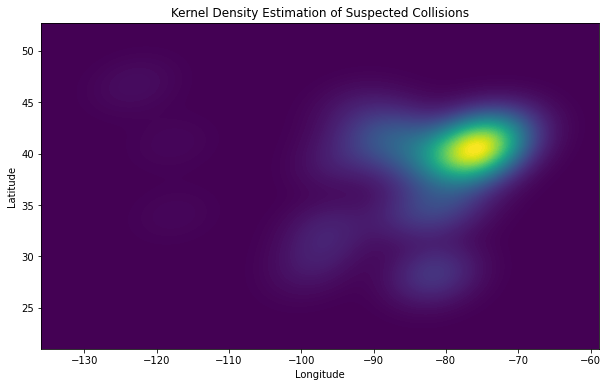

<Figure size 432x288 with 0 Axes>

In [120]:
import seaborn as sns

# Load your dataset
df = pd.read_csv('suspected_collisions_county.csv')

# Ensure there are no NaN values
#df['suspected_'] = df['suspected_'].fillna(0)  # Replace NaN values with zeros

# Create a KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='longitude', y='latitude', fill=True, cmap='viridis', thresh=0, levels=100)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig('kde_suspected_collisions_by_county_histogram.jpg', dpi=300)  # Specify the file name and DPI


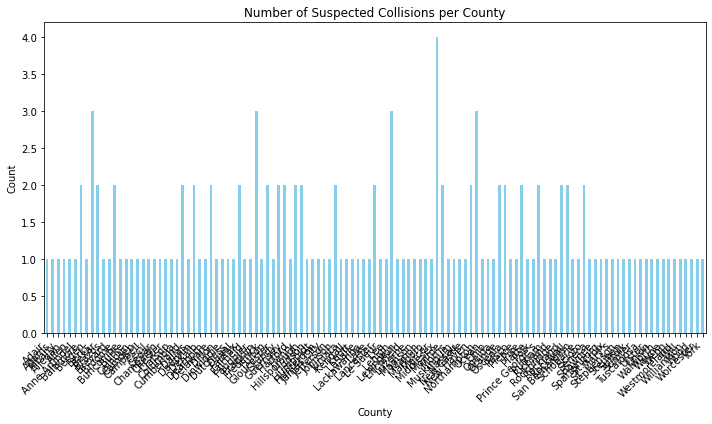

In [108]:
# Assuming you already have 'counted_suspected_collision' calculated
counted_suspected_collision.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Suspected Collisions per County')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


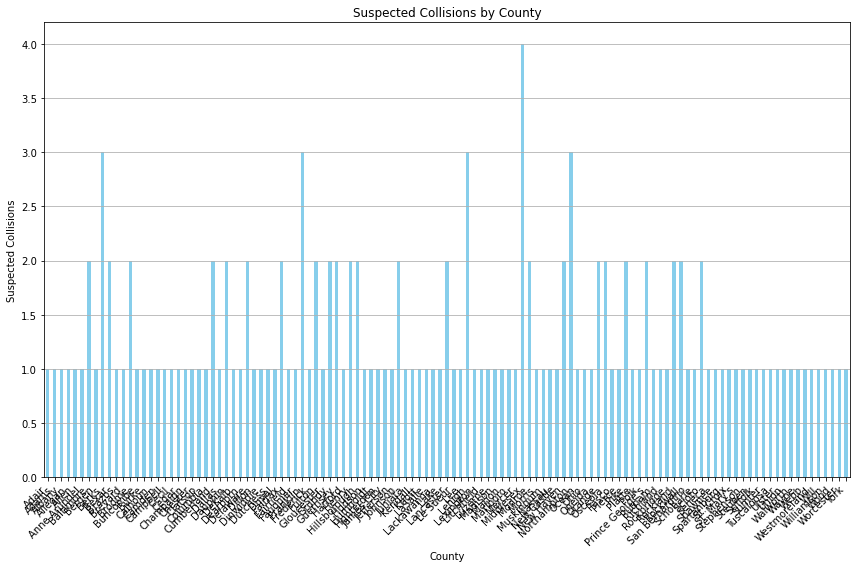

In [110]:
# Aggregate suspected_collision counts by county name
suspected_collision_by_county = df.groupby('NAME')['suspected_'].sum()

# Create histogram based on county names and suspected_collision counts
plt.figure(figsize=(12, 8))
suspected_collision_by_county.plot(kind='bar', color='skyblue')
plt.title('Suspected Collisions by County')
plt.xlabel('County')
plt.ylabel('Suspected Collisions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


WORKING Histogram

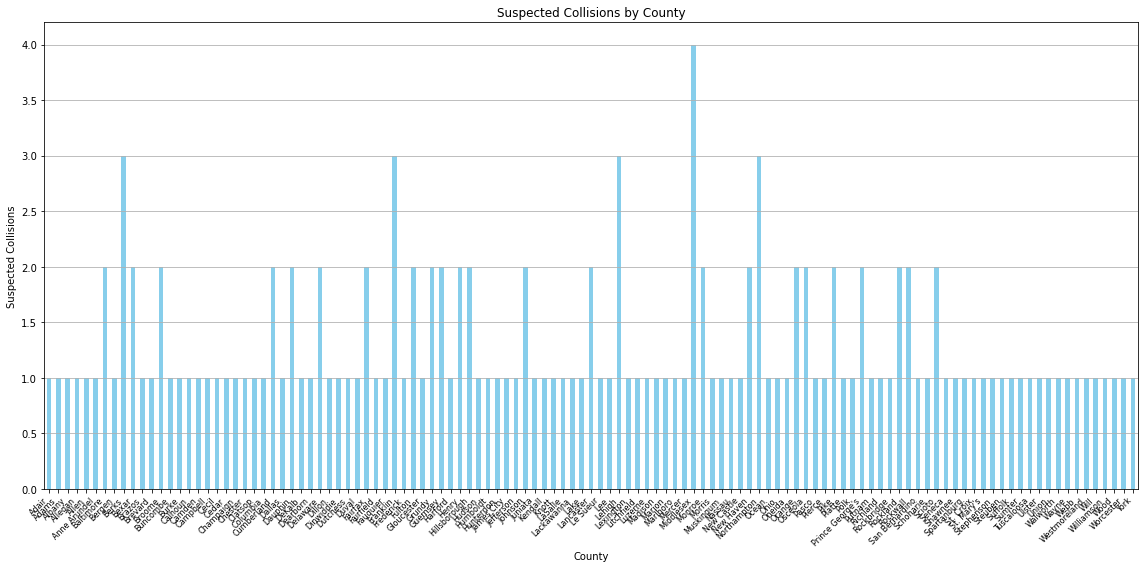

In [111]:
# Create histogram based on county names and suspected_collision counts with separated labels
plt.figure(figsize=(16, 8))  # Increase the figure size for better separation of labels
suspected_collision_by_county.plot(kind='bar', color='skyblue')
plt.title('Suspected Collisions by County')
plt.xlabel('County')
plt.ylabel('Suspected Collisions')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and adjust font size for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('suspected_collisions_by_county_histogram.jpg', dpi=300)  # Specify the file name and DPI
plt.show()


WORKING label for high hot spot areas

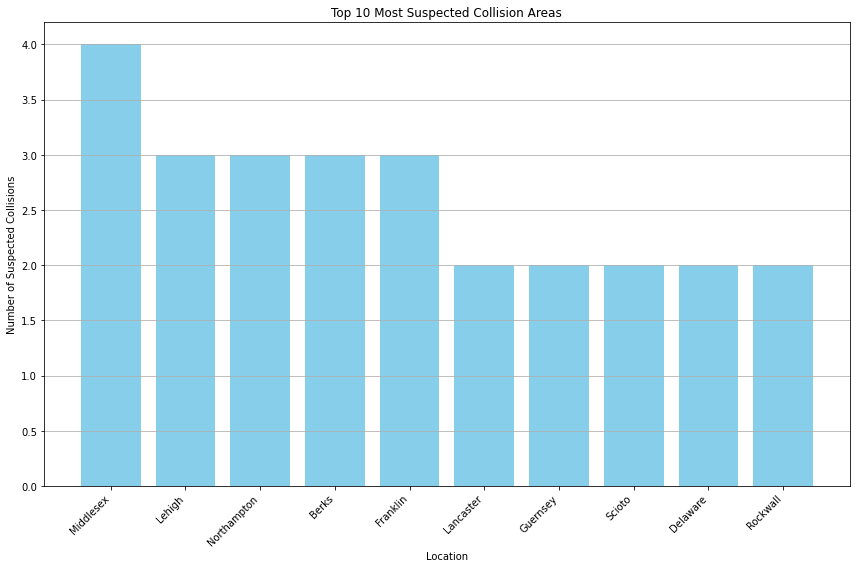

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('suspected_collisions_county.csv')

# Ensure there are no NaN values
#df['suspected_'] = df['suspected_'].fillna(0)  # Replace NaN values with zeros

# Group by 'NAME' and count the number of suspected collisions for each location
collision_counts = df.groupby('NAME')['suspected_'].sum().reset_index()

# Sort the counts in descending order
collision_counts = collision_counts.sort_values(by='suspected_', ascending=False)

# Select the top N locations (e.g., top 10)
top_n = 10
top_locations = collision_counts.head(top_n)

# Create a histogram
plt.figure(figsize=(12, 8))
plt.bar(top_locations['NAME'], top_locations['suspected_'], color='skyblue')
plt.title(f'Top {top_n} Most Suspected Collision Areas')
plt.xlabel('Location')
plt.ylabel('Number of Suspected Collisions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Save the plot to a file
plt.savefig("top_accident_prone_areas_histogram.png")

# Show the plot
plt.show()


WORKING Code for Predictive suspected collisions below

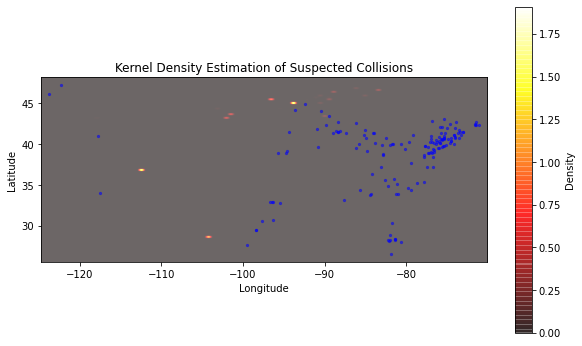

In [116]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load your dataset
df = pd.read_csv('suspected_collisions_county.csv')

# Ensure there are no NaN values
df['suspected_'] = df['suspected_'].fillna(0)  # Replace NaN values with zeros

# Prepare the data
data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'suspected_collision': df['suspected_']
}

df = pd.DataFrame(data)

# Ensure there are no NaN values in longitude and latitude
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['suspected_collision'].values

# Remove rows with NaN values in weights
weights = weights[~np.isnan(weights)]
coordinates = coordinates[:len(weights)]

# Perform KDE with a smaller bandwidth for more localized density estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(coordinates, sample_weight=weights)  # Adjust bandwidth here

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map with adjusted radius and blur
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=12, blur=3, max_zoom=1).add_to(m)  # Adjusted radius and blur

# Save map to an HTML file
m.save("smaller_hotspots_predictive_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Suspected Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
